In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import ROOT
from numba import jit
import matplotlib.pyplot as plt
import get_truth_neutron_data
import analysis as a
from matplotlib import rc
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
rc('text', usetex=False)

Welcome to JupyROOT 6.22/02


In [2]:
truth = get_truth_neutron_data.extract() #truth neutrons
a = a.analysis(E_cut = {'palila': 8.8, 'iiwi': 8.8, 'tako': 5.0, 'nene': 5.6, 'elepaio': 6.0, 'humu': 6.6}, recoils_only = True, fei4_restrict = True) #data and digitized recoils

In [3]:
crit = {'palila': 8.8, 'iiwi': 8.8, 'tako': 5.0, 'nene': 5.6, 'elepaio': 6.0, 'humu': 6.6}
datamc_lumi = 25
MC = truth.get_MC_data('RBB_Lumi')
cuts = truth.apply_RBB_cuts()
MC_LER = truth.get_MC_data('Touschek_LER')
MC_HER = truth.get_MC_data('Touschek_HER')
datamc = a.compute_data_MC_ratios("Cont_inj", E_cut = crit, L=datamc_lumi)[2]
datamc_storage = a.compute_data_MC_ratios("Decay", E_cut = crit)[2]

 FCN=23.3691 FROM MINOS     STATUS=SUCCESSFUL    222 CALLS        1287 TOTAL
                     EDM=2.90238e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.16294e-10   6.32898e-06   2.00893e-02  -8.48189e-06
   2  p1           7.29908e-14   5.71849e-08   6.14680e-02   3.64720e-06
   3  p2           1.50027e-02   8.18925e-03  -1.25374e-06  -4.54173e-02
   4  p3           2.62609e-01   5.72335e-02   5.72335e-02   1.97492e-02
 FCN=30.5615 FROM MINOS     STATUS=SUCCESSFUL    202 CALLS        1024 TOTAL
                     EDM=5.67336e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9.99999e-06   5.30638e-06   1.51382e-02   3.01795e-05
   2  p1           1.00000e-07   

Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in

In [6]:
datamc_storage

,LER_bg_base,LER_bg_base_err,LER_bg_dynamic,LER_bg_dynamic_err,LER_T,LER_T_err,HER_bg_base,HER_bg_base_err,HER_bg_dynamic,HER_bg_dynamic_err,HER_T,HER_T_err,Lumi,Lumi_err
elepaio,4.952667,4.992919,inf,NaN,inf,NaN,inf,NaN,0.000007,99.068451,0.957287,0.180234,0.226911,0.047935
tako,0.000002,2.816143,5.329071e-15,93.998367,inf,NaN,1.379310e+01,12.446179,inf,NaN,0.762007,0.293776,0.012798,0.001304
palila,0.000008,24.254983,8.832085e-05,23.165701,inf,NaN,3.245855e-07,11.137484,3.219130,31.764669,0.813600,0.285630,0.029503,0.005313
iiwi,12.000000,13.005801,2.399999e+01,22.887634,1.338288,0.221032,8.031375e-05,252.550867,31.083443,29.746971,0.059272,6.518887,0.000000,NaN
nene,inf,NaN,9.600000e+01,84.234570,1.567920,0.201029,1.999999e+02,244.822187,7.364028,348.906701,inf,NaN,0.000000,NaN
humu,15.999999,18.213555,2.742855e+01,31.543354,1.763910,0.275696,1.856405e-05,35.693089,inf,NaN,inf,NaN,0.000000,NaN


In [4]:
datamc

,LER_bg_base,LER_bg_base_err,LER_bg_dynamic,LER_bg_dynamic_err,LER_T,LER_T_err,HER_bg_base,HER_bg_base_err,HER_bg_dynamic,HER_bg_dynamic_err,HER_T,HER_T_err,Lumi,Lumi_err
elepaio,7.957304,8.544032,inf,NaN,inf,NaN,inf,NaN,2.646600e-08,20.869361,1.090742,0.219313,0.390485,0.062399
tako,0.000007,2.418768,2.213891e-05,91.883821,inf,NaN,5.188831e+00,9.101441,inf,NaN,0.417508,0.301314,0.019460,0.000841
palila,1.257606,39.201534,1.537290e+00,24.214010,inf,NaN,6.222909e-08,9.783001,8.948079e+00,44.121895,1.032877,0.384968,0.040710,0.003845
iiwi,0.000260,7.594782,1.751779e-05,13.724366,0.279613,0.157386,7.121952e+01,233.120665,3.034030e+00,88.309700,1.134771,3.148284,0.037991,0.013058
nene,inf,NaN,2.608073e-07,48.787402,0.475679,0.194206,5.391279e-05,170.752760,3.373507e-04,499.243631,inf,NaN,0.000539,0.000262
humu,15.999976,12.546583,2.742856e+01,31.939926,0.220901,0.207067,7.880554e-08,54.109740,inf,NaN,inf,NaN,0.000053,0.000160


In [ ]:
len(truth.get_MC_data('Touschek_LER')['palila'])

In [7]:
iiwi0 = MC['iiwi']

nene0 = MC['nene']

humu0 = MC['humu']

tako0 = MC['tako']

palila0 = MC['palila']

elepaio0 = MC['elepaio']


iiwi = cuts['iiwi']

nene = cuts['nene']

humu = cuts['humu']

tako = cuts['tako']

palila = cuts['palila']

elepaio = cuts['elepaio']

iiwi_SB = MC_LER['iiwi']
nene_SB = MC_LER['nene']
humu_SB = MC_LER['humu']

palila_SB = MC_HER['palila']
tako_SB = MC_HER['tako']
elepaio_SB = MC_HER['elepaio']

### Convert to 1MeV fluxes weighted by NIEL

In [8]:
fits = a.measure_and_fit_lumi_bgs("Cont_inj", bins=15)[0]


 FCN=93.1962 FROM MINOS     STATUS=SUCCESSFUL     32 CALLS         668 TOTAL
                     EDM=1.10552e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.41197e-14   6.46471e-06  -2.98673e-03** at limit **
   2  p1           9.13052e-18   8.26489e-08  -2.87964e-05** at limit **
   3  p2           2.34636e-02   7.74517e-03  -8.07706e-03  -1.74132e-03
   4  p3           1.65962e-01   5.29382e-02   5.29382e-02  -9.39097e-05
 FCN=93.8261 FROM MINOS     STATUS=SUCCESSFUL    207 CALLS         984 TOTAL
                     EDM=1.00176e-05    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9.99842e-06   6.54377e-06  -1.32033e-02   9.55662e-05
   2  p1           9.99675e-08   

Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).


In [9]:
neutrons = pd.read_csv('neutrons.csv')
neutrons = neutrons.drop(columns = neutrons.columns[0])
n_conversion = neutrons[['E','weight']].to_numpy()
@jit(nopython=True)
def add_NIEL_weights(e, conv, index = 0, diff = 1e9):
    for j in range(0,len(conv)):
        if np.abs(e - conv[j][0]) < diff:
            diff = np.abs(e - conv[j][0])
            index = j
    return conv[index][1]

def get_NIEL_weights(e_array, key='truthNeutronEnergy'):
    conversion = []
    for i in range(0,len(e_array)):
        conversion.append(add_NIEL_weights(e_array[i],conv=n_conversion))
    return conversion

tako['NIEL_weight'] = get_NIEL_weights(tako['truthNeutronEnergy'].to_numpy())
palila['NIEL_weight'] = get_NIEL_weights(palila['truthNeutronEnergy'].to_numpy())
elepaio['NIEL_weight'] = get_NIEL_weights(elepaio['truthNeutronEnergy'].to_numpy())
iiwi['NIEL_weight'] = get_NIEL_weights(iiwi['truthNeutronEnergy'].to_numpy())
nene['NIEL_weight'] = get_NIEL_weights(nene['truthNeutronEnergy'].to_numpy())
humu['NIEL_weight'] = get_NIEL_weights(humu['truthNeutronEnergy'].to_numpy())
tako0['NIEL_weight'] = get_NIEL_weights(tako0['truthNeutronEnergy'].to_numpy())
palila0['NIEL_weight'] = get_NIEL_weights(palila0['truthNeutronEnergy'].to_numpy())
elepaio0['NIEL_weight'] = get_NIEL_weights(elepaio0['truthNeutronEnergy'].to_numpy())
iiwi0['NIEL_weight'] = get_NIEL_weights(iiwi0['truthNeutronEnergy'].to_numpy())
nene0['NIEL_weight'] = get_NIEL_weights(nene0['truthNeutronEnergy'].to_numpy())
humu0['NIEL_weight'] = get_NIEL_weights(humu0['truthNeutronEnergy'].to_numpy())
tako_SB['NIEL_weight'] = get_NIEL_weights(tako_SB['truthNeutronEnergy'].to_numpy())
palila_SB['NIEL_weight'] = get_NIEL_weights(palila_SB['truthNeutronEnergy'].to_numpy())
elepaio_SB['NIEL_weight'] = get_NIEL_weights(elepaio_SB['truthNeutronEnergy'].to_numpy())
iiwi_SB['NIEL_weight'] = get_NIEL_weights(iiwi_SB['truthNeutronEnergy'].to_numpy())
nene_SB['NIEL_weight'] = get_NIEL_weights(nene_SB['truthNeutronEnergy'].to_numpy())
humu_SB['NIEL_weight'] = get_NIEL_weights(humu_SB['truthNeutronEnergy'].to_numpy())
''' OLD
def add_NIEL_weights(df, ekey = 'truthNeutronEnergy'):
    conversion = [] #list to be added to dataframe
    e = df[ekey].to_numpy() #use numpy to speed things up
    neutrons = pd.read_csv('neutrons.csv')
    neutrons = neutrons.drop(columns = neutrons.columns[0])
    conv = neutrons[['E','weight']].to_numpy()
    for i in range(0,len(e)):
        index = 0
        diff = 1e9
        for j in range(0,len(conv)):
            if np.abs(e[i] - conv[j][0]) < diff:
                diff = np.abs(e[i] - conv[j][0])
                index = j
        conversion.append(conv[index][1])
    df['NIEL_weight'] = conversion
'''

" OLD\ndef add_NIEL_weights(df, ekey = 'truthNeutronEnergy'):\n    conversion = [] #list to be added to dataframe\n    e = df[ekey].to_numpy() #use numpy to speed things up\n    neutrons = pd.read_csv('neutrons.csv')\n    neutrons = neutrons.drop(columns = neutrons.columns[0])\n    conv = neutrons[['E','weight']].to_numpy()\n    for i in range(0,len(e)):\n        index = 0\n        diff = 1e9\n        for j in range(0,len(conv)):\n            if np.abs(e[i] - conv[j][0]) < diff:\n                diff = np.abs(e[i] - conv[j][0])\n                index = j\n        conversion.append(conv[index][1])\n    df['NIEL_weight'] = conversion\n"

In [10]:
print(len(tako), tako['NIEL_weight'].sum())
print(len(palila), palila['NIEL_weight'].sum())
print(len(elepaio), elepaio['NIEL_weight'].sum())
print(len(iiwi), iiwi['NIEL_weight'].sum())
print(len(nene), nene['NIEL_weight'].sum())
print(len(humu), humu['NIEL_weight'].sum())
print()
print(len(tako0), tako0['NIEL_weight'].sum())
print(len(palila0), palila0['NIEL_weight'].sum())
print(len(elepaio0), elepaio0['NIEL_weight'].sum())
print(len(iiwi0), iiwi0['NIEL_weight'].sum())
print(len(nene0), nene0['NIEL_weight'].sum())
print(len(humu0), humu0['NIEL_weight'].sum())
print()
print(len(tako_SB), tako_SB['NIEL_weight'].sum())
print(len(palila_SB), palila_SB['NIEL_weight'].sum())
print(len(elepaio_SB), elepaio_SB['NIEL_weight'].sum())
print(len(iiwi_SB), iiwi_SB['NIEL_weight'].sum())
print(len(nene_SB), nene_SB['NIEL_weight'].sum())
print(len(humu_SB), humu_SB['NIEL_weight'].sum())
print()
print(len(tako)/len(tako0), tako['NIEL_weight'].sum()/tako0['NIEL_weight'].sum())
print(len(palila)/len(palila0), palila['NIEL_weight'].sum()/palila0['NIEL_weight'].sum())
print(len(elepaio)/len(elepaio0), elepaio['NIEL_weight'].sum()/elepaio0['NIEL_weight'].sum())
print(len(iiwi)/len(iiwi0), iiwi['NIEL_weight'].sum()/iiwi0['NIEL_weight'].sum())
print(len(nene)/len(nene0), nene['NIEL_weight'].sum()/nene0['NIEL_weight'].sum())
print(len(humu)/len(humu0), humu['NIEL_weight'].sum()/humu0['NIEL_weight'].sum())

165957 127409.9722148
43826 34371.9915016
14393 11121.61885
7727 7622.181711
142318 135131.9190586
194830 194719.93115600006

175184 132878.70692080003
48144 37156.9361246
16642 12821.7307597
10878 10078.407551
171046 155256.90189359998
256349 242553.7354517

14041 12085.0007103
14787 12507.7185082
29719 27219.905928
29952 24069.048946
38414 34250.023589
35515 32418.588794

0.9473296648095717 0.9588441607182437
0.9103107344632768 0.9250491317782199
0.8648599927893282 0.8674038675774083
0.7103327817613532 0.756288299756613
0.8320451808285491 0.870376243570853
0.7600185684359994 0.802790898245205


### Compute estimated fluxes

In [12]:
### Need to use the appropriate column of data_MC

bgType = 'RBB_Lumi'
lumi = 60

def estimate_fluxes(bgType,count,tpc, Lumi = 1): #Touschek_LER, Touschek_HER, or RBB_Lumi. Count is number of V0s from hotspot
    area = 11.3*2.95 #cm^2
    if bgType == 'Touschek_LER':
        time = 0.4 #scale parameters down
        col = 'LER_T'
    elif bgType == 'Touschek_HER':
        time = 1.6
        col = 'HER_T'
    else:
        time = 2.2e-3 * datamc_lumi/Lumi #25 is to scale down to L = 1e34, /60 scales up to 6e35
        col = 'Lumi'
    flux = count*datamc.loc[datamc.index==tpc][col]/(area*time)
    flux_err = count*datamc.loc[datamc.index==tpc][col+'_err']/(area*time)
    #if bgType == 'RBB_Lumi':
    #    flux = (fits['%s_int'%(tpc)]+fits['%s_slope'%(tpc)]*Lumi)*flux
    return flux[0], flux_err[0]

#NIEL WEIGHTED
iiwi_flux_weighted, iiwi_flux_err_weighted = estimate_fluxes(bgType,iiwi0['NIEL_weight'].sum(),'iiwi', Lumi = lumi)
nene_flux_weighted, nene_flux_err_weighted = estimate_fluxes(bgType,nene0['NIEL_weight'].sum(),'nene', Lumi = lumi)
humu_flux_weighted, humu_flux_err_weighted = estimate_fluxes(bgType,humu0['NIEL_weight'].sum(),'humu', Lumi = lumi)
tako_flux_weighted, tako_flux_err_weighted = estimate_fluxes(bgType,tako0['NIEL_weight'].sum(),'tako', Lumi = lumi)
palila_flux_weighted, palila_flux_err_weighted = estimate_fluxes(bgType,palila0['NIEL_weight'].sum(),'palila', Lumi = lumi)
elepaio_flux_weighted, elepaio_flux_err_weighted = estimate_fluxes(bgType,elepaio0['NIEL_weight'].sum(),'elepaio', Lumi = lumi)
#RAW FLUX
iiwi_flux, iiwi_flux_err = estimate_fluxes(bgType,len(iiwi0),'iiwi',Lumi = lumi)
nene_flux, nene_flux_err = estimate_fluxes(bgType,len(nene0),'nene',Lumi = lumi)
humu_flux, humu_flux_err = estimate_fluxes(bgType,len(humu0),'humu',Lumi = lumi)
tako_flux, tako_flux_err = estimate_fluxes(bgType,len(tako0),'tako',Lumi = lumi)
palila_flux, palila_flux_err = estimate_fluxes(bgType,len(palila0),'palila',Lumi = lumi)
elepaio_flux, elepaio_flux_err = estimate_fluxes(bgType,len(elepaio0),'elepaio',Lumi = lumi)

print(bgType)
print('Weighted Fluxes: iiwi = %s +/- %s'%(iiwi_flux_weighted, iiwi_flux_err_weighted))
print('Weighted Fluxes: nene = %s +/- %s'%(nene_flux_weighted, nene_flux_err_weighted))
print('Weighted Fluxes: humu = %s +/- %s'%(humu_flux_weighted, humu_flux_err_weighted))
print('Weighted Fluxes: palila = %s +/- %s'%(palila_flux_weighted, palila_flux_err_weighted))
print('Weighted Fluxes: tako = %s +/- %s'%(tako_flux_weighted, tako_flux_err_weighted))
print('Weighted Fluxes: elepaio = %s +/- %s'%(elepaio_flux_weighted, elepaio_flux_err_weighted))

print('RAW Fluxes: iiwi = %s +/- %s'%(iiwi_flux, iiwi_flux_err))
print('RAW Fluxes: nene = %s +/- %s'%(nene_flux, nene_flux_err))
print('RAW Fluxes: humu = %s +/- %s'%(humu_flux, humu_flux_err))
print('RAW Fluxes: palila = %s +/- %s'%(palila_flux, palila_flux_err))
print('RAW Fluxes: tako = %s +/- %s'%(tako_flux, tako_flux_err))
print('RAW Fluxes: elepaio = %s +/- %s'%(elepaio_flux, elepaio_flux_err))


RBB_Lumi
Weighted Fluxes: iiwi = 12530.238968660951 +/- 4306.974028079532
Weighted Fluxes: nene = 2740.81979558766 +/- 1330.2497736475134
Weighted Fluxes: humu = 417.6065453696263 +/- 1266.2183967923954
Weighted Fluxes: palila = 49502.45761648178 +/- 4675.850214070899
Weighted Fluxes: tako = 84624.28942545965 +/- 3655.859698383546
Weighted Fluxes: elepaio = 163847.11364981663 +/- 26182.45670474548
RAW Fluxes: iiwi = 13524.352811825858 +/- 4648.677208216339
RAW Fluxes: nene = 3019.55183336949 +/- 1465.5316447010205
RAW Fluxes: humu = 441.3579535256258 +/- 1338.234676925726
RAW Fluxes: palila = 64140.01174628752 +/- 6058.468651757082
RAW Fluxes: tako = 111566.56971041861 +/- 4819.794986290397
RAW Fluxes: elepaio = 212665.8028049287 +/- 33983.5902536585


In [ ]:
palila['NIEL_weight'].sum()/(palila0['NIEL_weight'].sum() + palila_SB['NIEL_weight'].sum())

In [13]:
### Need to use the appropriate column of data_MC
def estimate_fluxes(bgType,count,tpc): #Touschek_LER, Touschek_HER, or RBB_Lumi. Count is number of V0s from hotspot
    area = 11.3*2.95 #cm^2
    if bgType == 'Touschek_LER':
        time = 0.4 #scale parameters down
        col = 'LER_T'
    elif bgType == 'Touschek_HER':
        time = 1.6
        col = 'HER_T'
    else:
        time = 2.2e-3 * 25 #25 is to scale down to L = 1e34
        col = 'Lumi'
    flux = count*datamc.loc[datamc.index==tpc][col]/(area*time)
    flux_err = count*datamc.loc[datamc.index==tpc][col+'_err']/(area*time)
    return flux[0], flux_err[0]

#NIEL WEIGHTED
iiwi_flux_weighted, iiwi_flux_err_weighted = estimate_fluxes('Touschek_LER',iiwi_SB['NIEL_weight'].sum(),'iiwi')
nene_flux_weighted, nene_flux_err_weighted = estimate_fluxes('Touschek_LER',nene_SB['NIEL_weight'].sum(),'nene')
humu_flux_weighted, humu_flux_err_weighted = estimate_fluxes('Touschek_LER',humu_SB['NIEL_weight'].sum(),'humu')
tako_flux_weighted, tako_flux_err_weighted = estimate_fluxes('Touschek_HER',tako_SB['NIEL_weight'].sum(),'tako')
palila_flux_weighted, palila_flux_err_weighted = estimate_fluxes('Touschek_HER',palila_SB['NIEL_weight'].sum(),'palila')
elepaio_flux_weighted, elepaio_flux_err_weighted = estimate_fluxes('Touschek_HER',elepaio_SB['NIEL_weight'].sum(),'elepaio')
#RAW FLUX
iiwi_flux, iiwi_flux_err = estimate_fluxes('Touschek_LER',len(iiwi_SB),'iiwi')
nene_flux, nene_flux_err = estimate_fluxes('Touschek_LER',len(nene_SB),'nene')
humu_flux, humu_flux_err = estimate_fluxes('Touschek_LER',len(humu_SB),'humu')
tako_flux, tako_flux_err = estimate_fluxes('Touschek_HER',len(tako_SB),'tako')
palila_flux, palila_flux_err = estimate_fluxes('Touschek_HER',len(palila_SB),'palila')
elepaio_flux, elepaio_flux_err = estimate_fluxes('Touschek_HER',len(elepaio_SB),'elepaio')

#print(bgType)
print('Weighted Fluxes: iiwi = %s +/- %s'%(iiwi_flux_weighted, iiwi_flux_err_weighted))
print('Weighted Fluxes: nene = %s +/- %s'%(nene_flux_weighted, nene_flux_err_weighted))
print('Weighted Fluxes: humu = %s +/- %s'%(humu_flux_weighted, humu_flux_err_weighted))
print('Weighted Fluxes: palila = %s +/- %s'%(palila_flux_weighted, palila_flux_err_weighted))
print('Weighted Fluxes: tako = %s +/- %s'%(tako_flux_weighted, tako_flux_err_weighted))
print('Weighted Fluxes: elepaio = %s +/- %s'%(elepaio_flux_weighted, elepaio_flux_err_weighted))

print('RAW Fluxes: iiwi = %s +/- %s'%(iiwi_flux, iiwi_flux_err))
print('RAW Fluxes: nene = %s +/- %s'%(nene_flux, nene_flux_err))
print('RAW Fluxes: humu = %s +/- %s'%(humu_flux, humu_flux_err))
print('RAW Fluxes: palila = %s +/- %s'%(palila_flux, palila_flux_err))
print('RAW Fluxes: tako = %s +/- %s'%(tako_flux, tako_flux_err))
print('RAW Fluxes: elepaio = %s +/- %s'%(elepaio_flux, elepaio_flux_err))


Weighted Fluxes: iiwi = 504.72569353802925 +/- 284.0953975362246
Weighted Fluxes: nene = 1221.83975609845 +/- 498.8430241121196
Weighted Fluxes: humu = 537.0702650944899 +/- 503.43714085286564
Weighted Fluxes: palila = 242.21801795750198 +/- 90.27801572835277
Weighted Fluxes: tako = 94.59992271509546 +/- 68.2724534264751
Weighted Fluxes: elepaio = 556.6574391206985 +/- 111.9261239870005
RAW Fluxes: iiwi = 628.0906240528218 +/- 353.5339250876024
RAW Fluxes: nene = 1370.3859872914102 +/- 559.4902986985784
RAW Fluxes: humu = 588.3676981140219 +/- 551.5221581976652
RAW Fluxes: palila = 286.35740636387453 +/- 106.72937815957174
RAW Fluxes: tako = 109.91124838830744 +/- 79.32258686125802
RAW Fluxes: elepaio = 607.7648643234519 +/- 122.20220332752899


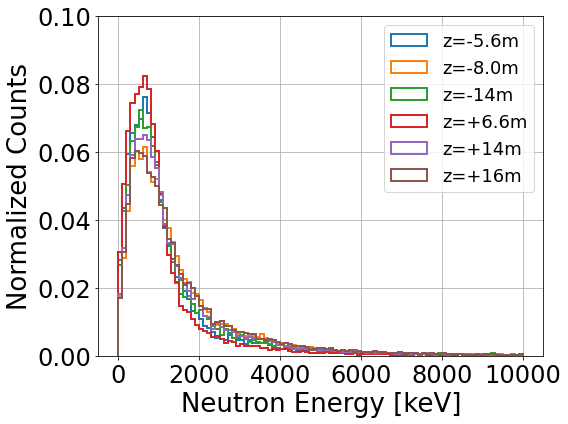

"\nlw=2\n\nplt.rc('legend', fontsize=18)\nplt.rc('xtick', labelsize=24)\nplt.rc('ytick', labelsize=24)\nplt.rc('axes', labelsize=26)\nplt.rc('axes', titlesize=26)\n\nfig, ax = plt.subplots(1,1, figsize = (8,6))\n\nax.set_xlabel('Neutron Energy [keV]')\nax.set_ylabel(r'Est. Flux [Hz$\\cdot$cm$^{-2}$]')\nax.set_ylim(0,250)\n\n(counts, bins) = np.histogram(palila['truthNeutronEnergy'], bins=100, range = (0,1e4))\nfactor = palila_flux_weighted/palila['NIEL_weight'].sum()\nax.hist(bins[:-1], bins, weights=factor*counts, histtype = 'step', label = 'z=-5.6m', lw=lw)\n\n(counts, bins) = np.histogram(tako['truthNeutronEnergy'], bins=100, range = (0,1e4))\nfactor = tako_flux_weighted/tako['NIEL_weight'].sum()\nax.hist(bins[:-1], bins, weights=factor*counts, histtype = 'step', label = 'z=-8.0m', lw=lw)\n\n(counts, bins) = np.histogram(elepaio['truthNeutronEnergy'], bins=100, range = (0,1e4))\nfactor = elepaio_flux_weighted/elepaio['NIEL_weight'].sum()\nax.hist(bins[:-1], bins, weights=factor*coun

In [14]:

lw=2

plt.rc('legend', fontsize=18)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)
plt.rc('axes', labelsize=26)
plt.rc('axes', titlesize=26)

fig, ax = plt.subplots(1,1, figsize = (8,6))

ax.set_xlabel('Neutron Energy [keV]')
#ax.set_ylabel(r'Est. Flux [Hz$\cdot$cm$^{-2}$]')
ax.set_ylabel(r'Normalized Counts')
ax.set_ylim(0,0.1)

(counts, bins) = np.histogram(palila_SB['truthNeutronEnergy'], bins=100, range = (0,1e4))
#factor = iiwi_flux_weighted/iiwi['NIEL_weight'].sum()
factor = 1/counts.sum()
ax.hist(bins[:-1], bins, weights=factor*counts, histtype = 'step', label = 'z=-5.6m', lw=lw)

(counts, bins) = np.histogram(elepaio_SB['truthNeutronEnergy'], bins=100, range = (0,1e4))
#factor = nene_flux_weighted/nene['NIEL_weight'].sum()
factor = 1/counts.sum()
ax.hist(bins[:-1], bins, weights=factor*counts, histtype = 'step', label = 'z=-8.0m', lw=lw)

(counts, bins) = np.histogram(tako_SB['truthNeutronEnergy'], bins=100, range = (0,1e4))
#factor = humu_flux_weighted/humu['NIEL_weight'].sum()
factor = 1/counts.sum()
ax.hist(bins[:-1], bins, weights=factor*counts, histtype = 'step', label = 'z=-14m', lw=lw)


(counts, bins) = np.histogram(iiwi_SB['truthNeutronEnergy'], bins=100, range = (0,1e4))
#factor = iiwi_flux_weighted/iiwi['NIEL_weight'].sum()
factor = 1/counts.sum()
ax.hist(bins[:-1], bins, weights=factor*counts, histtype = 'step', label = 'z=+6.6m', lw=lw, color = 'tab:red')

(counts, bins) = np.histogram(nene_SB['truthNeutronEnergy'], bins=100, range = (0,1e4))
#factor = nene_flux_weighted/nene['NIEL_weight'].sum()
factor = 1/counts.sum()
ax.hist(bins[:-1], bins, weights=factor*counts, histtype = 'step', label = 'z=+14m', lw=lw, color = 'tab:purple')

(counts, bins) = np.histogram(humu_SB['truthNeutronEnergy'], bins=100, range = (0,1e4))
#factor = humu_flux_weighted/humu['NIEL_weight'].sum()
factor = 1/counts.sum()
ax.hist(bins[:-1], bins, weights=factor*counts, histtype = 'step', label = 'z=+16m', lw=lw, color = 'tab:brown')

ax.grid()
plt.legend()

plt.tight_layout()
plt.savefig('truth_single_beam_touschek_spectrum.jpg')
plt.show()


'''
lw=2

plt.rc('legend', fontsize=18)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)
plt.rc('axes', labelsize=26)
plt.rc('axes', titlesize=26)

fig, ax = plt.subplots(1,1, figsize = (8,6))

ax.set_xlabel('Neutron Energy [keV]')
ax.set_ylabel(r'Est. Flux [Hz$\cdot$cm$^{-2}$]')
ax.set_ylim(0,250)

(counts, bins) = np.histogram(palila['truthNeutronEnergy'], bins=100, range = (0,1e4))
factor = palila_flux_weighted/palila['NIEL_weight'].sum()
ax.hist(bins[:-1], bins, weights=factor*counts, histtype = 'step', label = 'z=-5.6m', lw=lw)

(counts, bins) = np.histogram(tako['truthNeutronEnergy'], bins=100, range = (0,1e4))
factor = tako_flux_weighted/tako['NIEL_weight'].sum()
ax.hist(bins[:-1], bins, weights=factor*counts, histtype = 'step', label = 'z=-8.0m', lw=lw)

(counts, bins) = np.histogram(elepaio['truthNeutronEnergy'], bins=100, range = (0,1e4))
factor = elepaio_flux_weighted/elepaio['NIEL_weight'].sum()
ax.hist(bins[:-1], bins, weights=factor*counts, histtype = 'step', label = 'z=-14m', lw=lw)

ax.grid()
plt.legend()

plt.tight_layout()
plt.savefig('truth_HER_touschek_spectrum.jpg')
plt.show()
'''

In [ ]:
palila['NIEL_weight']

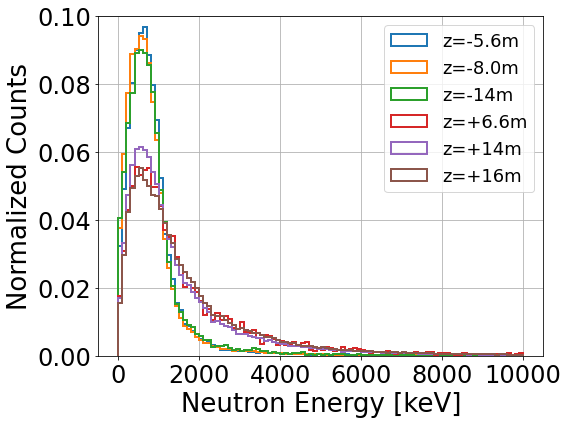

In [15]:
lw=2

plt.rc('legend', fontsize=18)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)
plt.rc('axes', labelsize=26)
plt.rc('axes', titlesize=26)

fig, ax = plt.subplots(1,1, figsize = (8,6))
(counts, bins) = np.histogram(palila0['truthNeutronEnergy'], bins=100, range = (0,1e4))
#factor = palila_flux_weighted/palila['NIEL_weight'].sum()/12.5
factor = 1/counts.sum()
ax.hist(bins[:-1], bins, weights=factor*counts, histtype = 'step', label = 'z=-5.6m', lw=lw)
ax.set_xlabel('Neutron Energy [keV]')
#ax.set_ylabel(r'Est. Flux [Hz$\cdot$cm$^{-2}$]')
ax.set_ylabel(r'Normalized Counts')
ax.set_ylim(0,0.1)

(counts, bins) = np.histogram(tako0['truthNeutronEnergy'], bins=100, range = (0,1e4))
#factor = tako_flux_weighted/tako['NIEL_weight'].sum()/12.5
factor = 1/counts.sum()
ax.hist(bins[:-1], bins, weights=factor*counts, histtype = 'step', label = 'z=-8.0m', lw=lw)

(counts, bins) = np.histogram(elepaio0['truthNeutronEnergy'], bins=100, range = (0,1e4))
#factor = elepaio_flux_weighted/elepaio['NIEL_weight'].sum()/12.5
factor = 1/counts.sum()
ax.hist(bins[:-1], bins, weights=factor*counts, histtype = 'step', label = 'z=-14m', lw=lw)

(counts, bins) = np.histogram(iiwi0['truthNeutronEnergy'], bins=100, range = (0,1e4))
#factor = iiwi_flux_weighted/iiwi['NIEL_weight'].sum()/12.5
factor = 1/counts.sum()
ax.hist(bins[:-1], bins, weights=factor*counts, histtype = 'step', label = 'z=+6.6m', lw=lw, color = 'tab:red')

(counts, bins) = np.histogram(nene0['truthNeutronEnergy'], bins=100, range = (0,1e4))
#factor = nene_flux_weighted/nene['NIEL_weight'].sum()/12.5
factor = 1/counts.sum()
ax.hist(bins[:-1], bins, weights=factor*counts, histtype = 'step', label = 'z=+14m', lw=lw, color = 'tab:purple')

(counts, bins) = np.histogram(humu0['truthNeutronEnergy'], bins=100, range = (0,1e4))
#factor = humu_flux_weighted/humu['NIEL_weight'].sum()/12.5
factor = 1/counts.sum()
ax.hist(bins[:-1], bins, weights=factor*counts, histtype = 'step', label = 'z=+16m', lw=lw, color = 'tab:brown')

ax.grid()
plt.legend()

plt.tight_layout()
plt.savefig('truth_lumi_spectrum.jpg')
plt.show()

### Compare Belle detector neutron rates

In [ ]:
import os
import uproot as ur

def compare_fractions_of_events(bgType, detector, base_path = '/home/jeef/data/phase3/Belle2_neutron_ntuples/'):
    detector = detector.upper()
    bgType = bgType.upper()
    fnames = {'BHWIDELARGEANGLE':'BHWideLargeAngle_Lumi_all.root',
             'BHWIDE':'BHWide_Lumi_all.root',
             'RBB':'RBB_Lumi_all.root',
             'TWOPHOTON':'twoPhoton_Lumi_all.root'}
    f = fnames[bgType]
    detID = {'IR':0, 'PXD':1, 'SVD':2, 'CDC':3, 'ARICH':4, 'TOP':5, 'ECL':6, 'EKLM':7, 'BKLM':8}    
    farbeamline_path = base_path + 'farbeamline/'
    nofarbeamline_path = base_path + 'no_farbeamline/'
    fbl = ur.open(farbeamline_path + f)['tree'].pandas.df()
    nfbl = ur.open(nofarbeamline_path + f)['tree'].pandas.df()
    neutrons_inside = nfbl.loc[nfbl['subDet'] == detID[detector]]['neutronWeight'].to_numpy().sum()
    neutrons_outside = fbl.loc[fbl['subDet'] == detID[detector]]['neutronWeight'].to_numpy().sum()
    diff = neutrons_outside-neutrons_inside
    frac = diff/(neutrons_outside)
    print(neutrons_inside)
    print(neutrons_outside)
    print(frac)
    return frac
compare_fractions_of_events('BHWIDE', 'ARICH')